In [1]:
##################################################
# This is a sample SageMath session for symODE2. #
# Tolga Birkandan                                #
# Please send any issues to:                     #
# birkandant@itu.edu.tr                          #
##################################################

In [2]:
reset()
load('ode2analyzer.sage')
#######################
# Definitions
u = function('u')(x)
u(x)=u
f1 = function('f1')(x)
f2 = function('f2')(x)
f3 = function('f3')(x)
#######################
# Recurrence relation of the hypergeometric equation:
show("Recurrence relation of the hypergeometric equation:")
var('a,b,c');f1(x)=x*(1-x);f2(x)=(c-(a+b+1)*x);f3(x)=-a*b;
myeqn=f1(x)*diff(u(x),x,x)+f2(x)*diff(u(x),x)+f3(x)*u(x)

var('r')
myrecurrence=find_indices_recurrence(myeqn,u,x,0,r,"recurrence").subs(r=0).subs(n=n+1)
show(solve(myrecurrence==0,C(n+1)))

'Recurrence relation of the hypergeometric equation:'

[C(n + 1) == (a*b + (a + b)*n + n^2)*C(n)/((c + 1)*n + n^2 + c)]

'Plot of the recurrence relation:'

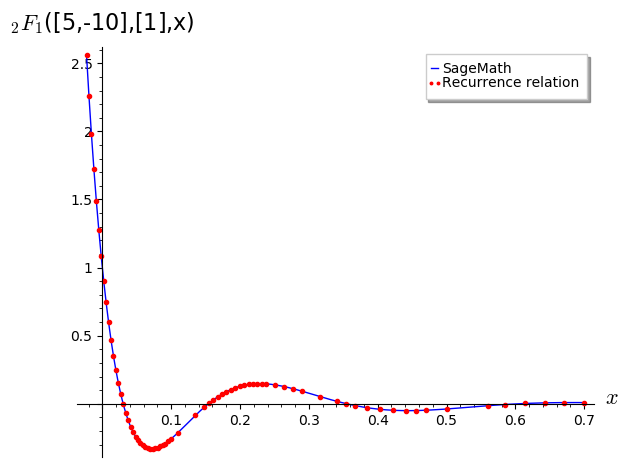

In [3]:
show('Plot of the recurrence relation:')

# Recurrence relation of the hypergeometric equation
def hypfromrecurrence(a,b,c,x):
    machineepsilon=abs((7./3)-(4./3)-1)
    Cn=1
    n=0
    result=1
    while True:
        coeff=(a*b + (a + b)*n + n^2)*(Cn)/((c + 1)*n + n^2 + c)
        newterm=coeff*(x^(n+1))
        if abs(newterm)<machineepsilon:
            break
        else:
            result=result+newterm
            Cn=coeff
            n=n+1
    return result

a=5
b=-10
c=1

hypsage(x)=hypergeometric([a,b],[c],x)

p1=plot(hypsage,(x,-0.023,0.7),legend_label='SageMath',axes_labels=[r'$x$', r'$_2F_1$([5,-10],[1],x)'])
p2=plot(hypfromrecurrence(a,b,c,x),(x,-0.023,0.7),legend_label='Recurrence relation',plot_points=10, linestyle='', marker='.',color='red')
(p1+p2).show()

((a1 + 1)*n^2 - (a1 - 1)*delta - a1*gamma + ((a1 - 1)*delta + a1*gamma - 3*a1 + alpha + beta - 2)*n + 2*a1 - alpha - beta + q + 1)*C(n - 1) - ((alpha - 2)*beta + (alpha + beta - 4)*n + n^2 - 2*alpha + 4)*C(n - 2) - (a1*n^2 + (a1*gamma - a1)*n)*C(n)

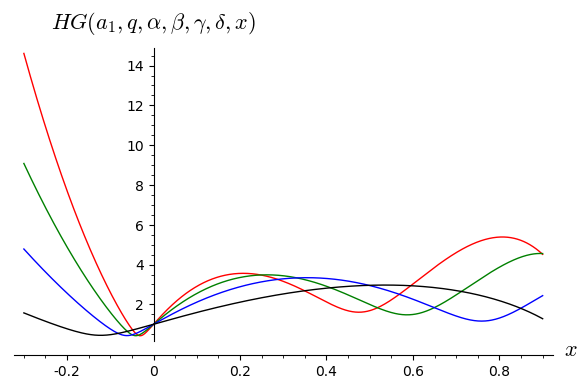

In [4]:
# Recurrence relation of the general Heun equation
reset()
load('ode2analyzer.sage')
#######################
# Definitions
u = function('u')(x)
u(x)=u
f1 = function('f1')(x)
f2 = function('f2')(x)
f3 = function('f3')(x)
#######################
# Recurrence relation of the general Heun equation:
var('alpha,beta,gamma,delta,epsilon,q,a1');
epsilon=alpha+beta+1-gamma-delta;
f1(x)=1;
f2(x)=(gamma/x)+(delta/(x-1))+(epsilon/(x-a1));
f3(x)=(alpha*beta*x-q)/(x*(x-1)*(x-a1))

myeqn=f1(x)*diff(u(x),x,x)+f2(x)*diff(u(x),x)+f3(x)*u(x)

var('r')
myrecurrence=find_indices_recurrence(myeqn,u,x,0,r,"recurrence").subs(r=0)
show(myrecurrence)

def HG(a,q,alpha,beta,gamma,delta,x):
    #Solution around z=0
    machineepsilon=abs((7./3)-(4./3)-1)
    bprevprev=0.0
    bprev=1.0
    n=1
    res=1.0
    while True:
        P=-(-a1*n^2 - (a1*gamma - a1)*n)
        Q=(a1 + 1)*n^2 - (a1 - 1)*delta - a1*gamma + ((a1 - 1)*delta + a1*gamma - 3*a1 + alpha + beta - 2)*n + 2*a1 - alpha - beta + q + 1
        R=-(alpha - 2)*beta - (alpha + beta - 4)*n - n^2 + 2*alpha - 4
        b=(Q*bprev+R*bprevprev)/P
        newterm=b*(x**n)
        if abs(newterm)<machineepsilon:
            break
        elif n>500:
            break
        else:
            res=res+newterm
            bprevprev=bprev
            bprev=b
            n=n+1
    return res

#var('a,q,alpha,beta,gamma,delta,z')
a1=4.0 + I
alpha=-0.6 + 0.9*I
beta=-0.7*I
gamma=-0.18 - 0.03*I
delta=0.3 + 0.6*I

p=[]
q=[-20,-15,-10,-5]
colors=['red','green','blue','black']
for i in range(len(q)):
    p.append(plot(abs(HG(a1,q[i],alpha,beta,gamma,delta,x)),(x,-3.0/10,9.0/10), color=colors[i],axes_labels=[r'$x$', r'$HG(a_1,q,\alpha,\beta,\gamma,\delta,x)$']))
myplot=sum(i for i in p)
myplot.show()

In [5]:
# Change of variables:
show('Change of variables:')
reset()
load('ode2analyzer.sage')
#######################  
u = function('u')(x)
u(x)=u
f1 = function('f1')(x)
f2 = function('f2')(x)
f3 = function('f3')(x)
#######################
myeqn=f1(x)*diff(u(x),x,x)+f2(x)*diff(u(x),x)+f3(x)*u(x)
show(myeqn)
myresult=ode_change_of_variable(diffeqn=myeqn,y=u,z=x,transformation=sqrt(x))
show(myresult)

'Change of variables:'

f3(x)*u(x) + f2(x)*diff(u(x), x) + f1(x)*diff(u(x), x, x)

4*x*f1(sqrt(x))*diff(u(x), x, x) + f3(sqrt(x))*u(x) + 2*(sqrt(x)*f2(sqrt(x)) + f1(sqrt(x)))*diff(u(x), x)

In [6]:
# Hypergeometric and Heun type equations:
show('Hypergeometric and Heun type equations:')

'Hypergeometric and Heun type equations:'

In [7]:
# Hypergeometric:
reset()
load('hypergeometric_heun.sage') #Routines for the symbolic solutions
#######################  
u = function('u')(x)
u(x)=u
f1 = function('f1')(x)
f2 = function('f2')(x)
f3 = function('f3')(x)
#######################
show('Hypergeometric:')
var('a,b,c');f1(x)=x*(1-x);f2(x)=(c-(a+b+1)*x);f3(x)=-a*b;
myeqn=f1(x)*diff(u(x),x,x)+f2(x)*diff(u(x),x)+f3(x)*u(x)
show(myeqn)
mysingularities=find_singularities(diffeqn=myeqn,y=u,z=x)
show(mysingularities)
myresult=find_special_ode(diffeqn=myeqn,y=u,z=x)

'Hypergeometric:'

-a*b*u(x) - (x - 1)*x*diff(u(x), x, x) - ((a + b + 1)*x - c)*diff(u(x), x)

([1, 0, +Infinity], [[-a - b + c, 0], [-c + 1, 0], [b, a]], [], [])

(C2*x*hypergeometric((a - c + 1, b - c + 1), (-c + 2,), x) + C1*x^c*hypergeometric((a, b), (c,), x))/x^c

In [8]:
# Confluent hypergeometric:
reset()
load('hypergeometric_heun.sage') #Routines for the symbolic solutions
#######################  
u = function('u')(x)
u(x)=u
f1 = function('f1')(x)
f2 = function('f2')(x)
f3 = function('f3')(x)
#######################
show('Confluent hypergeometric:')
var('a,b');f1(x)=x;f2(x)=b-x;f3(x)=-a;
myeqn=f1(x)*diff(u(x),x,x)+f2(x)*diff(u(x),x)+f3(x)*u(x)
show(myeqn)
mysingularities=find_singularities(diffeqn=myeqn,y=u,z=x)
show(mysingularities)
myresult=find_special_ode(diffeqn=myeqn,y=u,z=x)

'Confluent hypergeometric:'

-a*u(x) + (b - x)*diff(u(x), x) + x*diff(u(x), x, x)

([0], [[-b + 1, 0]], [+Infinity], [1])

C1*hypergeometric_M(a, b, x) + C2*hypergeometric_U(a, b, x)

In [9]:
# General Heun:
reset()
load('hypergeometric_heun.sage') #Routines for the symbolic solutions
#######################  
u = function('u')(x)
u(x)=u
f1 = function('f1')(x)
f2 = function('f2')(x)
f3 = function('f3')(x)
#######################
show('General Heun:')
var('alpha,beta,gamma,delta,epsilon,q,a1');epsilon=alpha+beta+1-gamma-delta;f1(x)=1;f2(x)=(gamma/x)+(delta/(x-1))+(epsilon/(x-a1));f3(x)=(alpha*beta*x-q)/(x*(x-1)*(x-a1))
myeqn=f1(x)*diff(u(x),x,x)+f2(x)*diff(u(x),x)+f3(x)*u(x)
show(myeqn)
mysingularities=find_singularities(diffeqn=myeqn,y=u,z=x)
show(mysingularities)
myresult=find_special_ode(diffeqn=myeqn,y=u,z=x)

'General Heun:'

-((alpha + beta - delta - gamma + 1)/(a1 - x) - delta/(x - 1) - gamma/x)*diff(u(x), x) - (alpha*beta*x - q)*u(x)/((a1 - x)*(x - 1)*x) + diff(u(x), x, x)

([a1, 1, 0, +Infinity],
 [[-alpha - beta + delta + gamma, 0],
  [-delta + 1, 0],
  [-gamma + 1, 0],
  [beta, alpha]],
 [],
 [])

C2*x^(-gamma + 1)*HG(a1, -(a1*delta + alpha + beta - delta - gamma + 1)*(gamma - 1) + q, alpha - gamma + 1, beta - gamma + 1, -gamma + 2, delta, x) + C1*HG(a1, q, alpha, beta, gamma, delta, x)

In [10]:
# (Singly) confluent Heun:
reset()
load('hypergeometric_heun.sage') #Routines for the symbolic solutions
#######################  
u = function('u')(x)
u(x)=u
f1 = function('f1')(x)
f2 = function('f2')(x)
f3 = function('f3')(x)
#######################
show('(Singly) confluent Heun:')
var('alpha,beta,gamma,mu,nu');f1(x)=1;f2(x)=((beta+1)/x)+((gamma+1)/(x-1))+alpha;f3(x)=(mu/x)+(nu/(x-1))
myeqn=f1(x)*diff(u(x),x,x)+f2(x)*diff(u(x),x)+f3(x)*u(x)
show(myeqn)
mysingularities=find_singularities(diffeqn=myeqn,y=u,z=x)
show(mysingularities)
myresult=find_special_ode(diffeqn=myeqn,y=u,z=x)

'(Singly) confluent Heun:'

(nu/(x - 1) + mu/x)*u(x) + (alpha + (gamma + 1)/(x - 1) + (beta + 1)/x)*diff(u(x), x) + diff(u(x), x, x)

([1, 0], [[-gamma, 0], [-beta, 0]], [+Infinity], [1])

C1*HC(alpha, beta, gamma, -1/2*alpha*beta - 1/2*alpha*gamma - alpha + mu + nu, 1/2*alpha*beta - 1/2*beta*gamma + 1/2*alpha - 1/2*beta - 1/2*gamma - mu, x) + C2*HC(alpha, -beta, gamma, -1/2*alpha*beta - 1/2*alpha*gamma - alpha + mu + nu, 1/2*alpha*beta - 1/2*beta*gamma + 1/2*alpha - 1/2*beta - 1/2*gamma - mu, x)/x^beta

In [11]:
# Double confluent Heun:
reset()
load('hypergeometric_heun.sage') #Routines for the symbolic solutions
#######################  
u = function('u')(x)
u(x)=u
f1 = function('f1')(x)
f2 = function('f2')(x)
f3 = function('f3')(x)
#######################
show('Double confluent Heun:')
var('alpha,gamma,delta,epsilon,q');f1(x)=1;f2(x)=(delta/x)+(gamma/(x^2))+epsilon;f3(x)=(alpha*x-q)/(x^2)
myeqn=f1(x)*diff(u(x),x,x)+f2(x)*diff(u(x),x)+f3(x)*u(x)
show(myeqn)
mysingularities=find_singularities(diffeqn=myeqn,y=u,z=x)
show(mysingularities)
myresult=find_special_ode(diffeqn=myeqn,y=u,z=x)
show(myresult)

'Double confluent Heun:'

(epsilon + delta/x + gamma/x^2)*diff(u(x), x) + (alpha*x - q)*u(x)/x^2 + diff(u(x), x, x)

([], [], [0, +Infinity], [1, 1])

C2*x^2*HD(delta + q - 2, alpha - 2*epsilon, -gamma, -delta + 4, -epsilon, x)*e^(-epsilon*x + gamma/x)/x^delta + C1*HD(q, alpha, gamma, delta, epsilon, x)

C2*x^2*HD(delta + q - 2, alpha - 2*epsilon, -gamma, -delta + 4, -epsilon, x)*e^(-epsilon*x + gamma/x)/x^delta + C1*HD(q, alpha, gamma, delta, epsilon, x)

In [12]:
# Biconfluent Heun:
reset()
load('hypergeometric_heun.sage') #Routines for the symbolic solutions
#######################  
u = function('u')(x)
u(x)=u
f1 = function('f1')(x)
f2 = function('f2')(x)
f3 = function('f3')(x)
#######################
show('Biconfluent Heun:')
var('alpha,gamma,delta,epsilon,q');f1(x)=1;f2(x)=((gamma/x)+delta+epsilon*x);f3(x)=(alpha*x-q)/(x)
myeqn=f1(x)*diff(u(x),x,x)+f2(x)*diff(u(x),x)+f3(x)*u(x)
show(myeqn)
mysingularities=find_singularities(diffeqn=myeqn,y=u,z=x)
show(mysingularities)
myresult=find_special_ode(diffeqn=myeqn,y=u,z=x)

'Biconfluent Heun:'

(epsilon*x + delta + gamma/x)*diff(u(x), x) + (alpha*x - q)*u(x)/x + diff(u(x), x, x)

([0], [[-gamma + 1, 0]], [+Infinity], [2])

C2*x*HB(delta*gamma - delta + q, -epsilon*gamma + alpha + epsilon, -gamma + 2, delta, epsilon, x)/x^gamma + C1*HB(q, alpha, gamma, delta, epsilon, x)

In [13]:
# Triconfluent Heun:
reset()
load('hypergeometric_heun.sage') #Routines for the symbolic solutions
#######################  
u = function('u')(x)
u(x)=u
f1 = function('f1')(x)
f2 = function('f2')(x)
f3 = function('f3')(x)
#######################
show('Triconfluent Heun:')
var('alpha,gamma,delta,epsilon,q');f1(x)=1;f2(x)=gamma+delta*x+epsilon*x^2;f3(x)=(alpha*x-q)
myeqn=f1(x)*diff(u(x),x,x)+f2(x)*diff(u(x),x)+f3(x)*u(x)
show(myeqn)
mysingularities=find_singularities(diffeqn=myeqn,y=u,z=x)
show(mysingularities)
myresult=find_special_ode(diffeqn=myeqn,y=u,z=x)

'Triconfluent Heun:'

(alpha*x - q)*u(x) + (epsilon*x^2 + delta*x + gamma)*diff(u(x), x) + diff(u(x), x, x)

([], [], [+Infinity], [3])

C2*HT(delta + q, alpha - 2*epsilon, -gamma, -delta, -epsilon, x)*e^(-1/3*epsilon*x^3 - 1/2*delta*x^2 - gamma*x) + C1*HT(q, alpha, gamma, delta, epsilon, x)

In [14]:
# Hypergeometric equation: Equation (15) of Nasheeha:
reset()
load('hypergeometric_heun.sage') #Routines for the symbolic solutions
#######################  
u = function('u')(x)
u(x)=u
f1 = function('f1')(x)
f2 = function('f2')(x)
f3 = function('f3')(x)
#######################
show('Hypergeometric equation: Equation (15) of Nasheeha:')
var('a,b,k,alpha');
f1(x)=4*(1+a*x)*(1+b*x);
f2(x)=2*(a-b);
f3(x)=((b^2)-a*b-k*b)

myeqn=(f1(x)*diff(u(x),x,x)+f2(x)*diff(u(x),x)+f3(x)*u(x))
myresult=find_special_ode(diffeqn=myeqn,y=u,z=x)
myeqn2=ode_change_of_variable(diffeqn=myeqn,y=u,z=x,transformation=((a-b)*x-a)/(a*b))
myeqn2=myeqn2.subs(k==a*(2*alpha+1)^2-2*a+b)
myresult=find_special_ode(diffeqn=myeqn2,y=u,z=x)

'Hypergeometric equation: Equation (15) of Nasheeha:'

(sqrt(a*x + 1)*C2*sqrt(b)*hypergeometric((-1/2*sqrt(2*a - b + k)/sqrt(a), 1/2*sqrt(2*a - b + k)/sqrt(a)), (3/2,), -(a*b*x + b)/(a - b)) + C1*sqrt(-a + b)*hypergeometric((1/2*(sqrt(2*a - b + k) - sqrt(a))/sqrt(a), -1/2*(sqrt(2*a - b + k) + sqrt(a))/sqrt(a)), (1/2,), -(a*b*x + b)/(a - b)))/sqrt(-a + b)

C2*x^(3/2)*hypergeometric((-alpha + 1/2, alpha + 3/2), (5/2,), x) + C1*hypergeometric((-alpha - 1, alpha), (-1/2,), x)

In [15]:
# Confluent hypergeometric equation: Whittaker equation:
reset()
load('hypergeometric_heun.sage') #Routines for the symbolic solutions
#######################  
u = function('u')(x)
u(x)=u
f1 = function('f1')(x)
f2 = function('f2')(x)
f3 = function('f3')(x)
#######################
show('Confluent hypergeometric equation: Whittaker equation:')
var('kappa,mu');f1(x)=1;f2(x)=0;f3(x)=(-1/4)+(kappa/x)+((1/4)-(mu^2))/(x^2)
myeqn=f1(x)*diff(u(x),x,x)+f2(x)*diff(u(x),x)+f3(x)*u(x)
myeqn=myeqn.substitute_function(u(x),exp(-x/2)*u(x))
myresult=find_special_ode(diffeqn=myeqn,y=u,z=x)

'Confluent hypergeometric equation: Whittaker equation:'

C1*sqrt(x)*x^mu*hypergeometric_M(-kappa + mu + 1/2, 2*mu + 1, x) + C2*sqrt(x)*x^mu*hypergeometric_U(-kappa + mu + 1/2, 2*mu + 1, x)

In [16]:
# General Heun equation: Equation (10) of Petroff:
reset()
load('hypergeometric_heun.sage') #Routines for the symbolic solutions
#######################  
u = function('u')(x)
u(x)=u
f1 = function('f1')(x)
f2 = function('f2')(x)
f3 = function('f3')(x)
#######################
show('General Heun equation: Equation (10) of Petroff:')
var('A');f1(x)=(x-A)*((x^2)-1);f2(x)=4*(x^2)-5*A*x+1;f3(x)=-4*A;
myeqn=(f1(x)*diff(u(x),x,x)+f2(x)*diff(u(x),x)+f3(x)*u(x))
show(myeqn)
myeqn2=ode_change_of_variable(diffeqn=myeqn,y=u,z=x,transformation=1-2*x)
myresult=find_special_ode(diffeqn=myeqn2,y=u,z=x)

'General Heun equation: Equation (10) of Petroff:'

-(x^2 - 1)*(A - x)*diff(u(x), x, x) - 4*A*u(x) - (5*A*x - 4*x^2 - 1)*diff(u(x), x)

C1*HG(-1/2*A + 1/2, -2*A, 3, 0, 5/2, 5/2, x) + C2*HG(-1/2*A + 1/2, -1/8*A - 3/8, 3/2, -3/2, -1/2, 5/2, x)/x^(3/2)

In [17]:
# Confluent Heun equation: Equation (26) of Sakalli:
reset()
load('hypergeometric_heun.sage') #Routines for the symbolic solutions
#######################  
u = function('u')(x)
u(x)=u
f1 = function('f1')(x)
f2 = function('f2')(x)
f3 = function('f3')(x)
#######################
show('Confluent Heun equation: Equation (26) of Sakalli:')
var('L1,L2,omega,m,r');
f1(x)=x*(1-x);
f2(x)=1-2*x;
f3(x)=((L1^2)*(omega^2)*((1/x)-1))+((m^2)*(L1)*r*(1-x))+(L2*(L2+1)*L1)
myeqn=(f1(x)*diff(u(x),x,x)+f2(x)*diff(u(x),x)+f3(x)*u(x))
myresult=find_special_ode(diffeqn=myeqn,y=u,z=x)

'Confluent Heun equation: Equation (26) of Sakalli:'

C2*x^(I*L1*omega)*x^(-2*I*L1*omega)*HC(0, -2*I*L1*omega, 0, L1*m^2*r, -L1*m^2*r - L1*L2^2 - L1*L2, x) + C1*x^(I*L1*omega)*HC(0, 2*I*L1*omega, 0, L1*m^2*r, -L1*m^2*r - L1*L2^2 - L1*L2, x)

In [18]:
# Biconfluent Heun equation: Equation (10) of Vitoria:
reset()
load('hypergeometric_heun.sage') #Routines for the symbolic solutions
#######################  
u = function('u')(x)
u(x)=u
f1 = function('f1')(x)
f2 = function('f2')(x)
f3 = function('f3')(x)
#######################
show('Biconfluent Heun equation: Equation (10) of Vitoria:')
var('gamma,beta,m,omega,delta')
f1(x)=1
f2(x)=1/x
f3(x)=(beta/(m*omega))+(delta/x)-((gamma^2)/(x^2))-x^2
myeqn=f1(x)*diff(u(x),x,x)+f2(x)*diff(u(x),x)+f3(x)*u(x)
myeqn=myeqn.substitute_function(u(x),exp(-(x^2)/2)*(x^gamma)*u(x))
#myeqn=(myeqn/(exp(-(x^2)/2)*(x^gamma))).full_simplify().expand().collect(u).collect(diff(u,x))
myeqn=ode_change_of_variable(diffeqn=myeqn,y=u,z=x,transformation=-x)
show(myeqn)
myresult=find_special_ode(diffeqn=myeqn,y=u,z=x)

'Biconfluent Heun equation: Equation (10) of Vitoria:'

diff(u(x), x)/x - (m*omega*x^4 + gamma^2*m*omega + delta*m*omega*x - beta*x^2)*u(x)/(m*omega*x^2) + diff(u(x), x, x)

C1*HB(delta, -2*gamma + beta/(m*omega) - 2, 2*gamma + 1, 0, -2, x)*e^(-1/2*x^2) + C2*HB(delta, 2*gamma + beta/(m*omega) - 2, -2*gamma + 1, 0, -2, x)*e^(-1/2*x^2)/x^(2*gamma)

In [19]:
# Double confluent Heun equation: Equation (11) of Vieira:
reset()
load('hypergeometric_heun.sage') #Routines for the symbolic solutions
#######################  
u = function('u')(x)
u(x)=u
f1 = function('f1')(x)
f2 = function('f2')(x)
f3 = function('f3')(x)
#######################
show('Double confluent Heun equation: Equation (11) of Vieira:')
var('A1,A2,A3');f1(x)=1;f2(x)=1/x;f3(x)=A1+(A2/x^2)+(A3/x^4)
myeqn=f1(x)*diff(u(x),x,x)+f2(x)*diff(u(x),x)+f3(x)*u(x)
myresult=find_special_ode(diffeqn=myeqn,y=u,z=x)

myeqn2=ode_change_of_variable(diffeqn=myeqn,y=u,z=x,transformation=sqrt(x^2-1)/(x-1))
myeqn2=(myeqn2/myeqn2.coefficient(diff(u(x),x,x))).expand().normalize().full_simplify().factor()
show('Coefficients of the equation (please check with the original paper):')
coefficientofsecondderivative=myeqn2.coefficient(diff(u(x),x,x)).factor()
coefficientoffirstderivative=myeqn2.coefficient(diff(u(x),x))
coefficientofnoderivative=myeqn2.coefficient(u(x)).full_simplify()
show('2nd derivative:')
show(coefficientofsecondderivative)
show('1st derivative:')
show(coefficientoffirstderivative)
show('No derivative:')
show(coefficientofnoderivative)

'Double confluent Heun equation: Equation (11) of Vieira:'

C2*HD(-A2 + 2*sqrt(A1)*sqrt(A3) - 1/4, 2*I*sqrt(A1), 2*I*sqrt(A3), 2, 2*I*sqrt(A1), x)*e^(-1/3*I*sqrt(A1)*x^3 + 1/4*x^2 + 2*I*sqrt(A1)*x - I*sqrt(A3)*x - 2*I*sqrt(A3)/x) + C1*HD(-A2 + 2*sqrt(A1)*sqrt(A3) - 1/4, -2*I*sqrt(A1), -2*I*sqrt(A3), 2, -2*I*sqrt(A1), x)*e^(-1/3*I*sqrt(A1)*x^3 + 1/4*x^2 - I*sqrt(A3)*x)

'Coefficients of the equation (please check with the original paper):'

'2nd derivative:'

1

'1st derivative:'

2*(x^5 - 2*x^3 + x)/((x + 1)^3*(x - 1)^3)

'No derivative:'

((A1 + A2 + A3)*x^2 + 2*(A1 - A3)*x + A1 - A2 + A3)/(x^6 - 3*x^4 + 3*x^2 - 1)

In [20]:
# Triconfluent Heun equation: Equation (5) of Dong:
reset()
load('hypergeometric_heun.sage') #Routines for the symbolic solutions
#######################  
u = function('u')(x)
u(x)=u
f1 = function('f1')(x)
f2 = function('f2')(x)
f3 = function('f3')(x)
#######################
show('Triconfluent Heun equation: Equation (5) of Dong:')
var('a,b,epsilon');
f1(x)=1
f2(x)=-sqrt(2)*(a+2*b*x^2)/sqrt(b)
f3(x)=((a^2)-4*sqrt(2*b^3)*x+4*b*epsilon)/(2*b)
myeqn=(f1(x)*diff(u(x),x,x)+f2(x)*diff(u(x),x)+f3(x)*u(x))
show(myeqn)
show(find_singularities(diffeqn=myeqn,y=u,z=x))
myeqn2=ode_change_of_variable(diffeqn=myeqn,y=u,z=x,transformation=x*((8*b)/9)^-(1/6))
myresult=find_special_ode(diffeqn=myeqn2,y=u,z=x)

'Triconfluent Heun equation: Equation (5) of Dong:'

-sqrt(2)*(2*b*x^2 + a)*diff(u(x), x)/sqrt(b) + 1/2*(a^2 + 4*b*epsilon - 4*sqrt(2)*sqrt(b^3)*x)*u(x)/b + diff(u(x), x, x)

([], [], [+Infinity], [3])

C1*HT(-1/4*3^(2/3)*a^2/b^(4/3) - 3^(2/3)*epsilon/b^(1/3), 3, 3^(1/3)*a/b^(2/3), 0, 3, x)*e^(x^3 + 3^(1/3)*a*x/b^(2/3)) + C2*HT(-1/4*3^(2/3)*a^2/b^(4/3) - 3^(2/3)*epsilon/b^(1/3), -3, -3^(1/3)*a/b^(2/3), 0, -3, x)

In [21]:
# Lame equation (Mathematica example):
reset()
load('hypergeometric_heun.sage') #Routines for the symbolic solutions
#######################  
u = function('u')(x)
u(x)=u
f1 = function('f1')(x)
f2 = function('f2')(x)
f3 = function('f3')(x)
#######################
show('Lame equation: ')
var('a,h,v');
f1(x)=1
f2(x)=(1/2)*((1/x)+(1/(x-1))+(1/(x-a)))
f3(x)=(a*h-v*(v+1)*x)/(4*x*(x-1)*(x-a))
myeqn=(f1(x)*diff(u(x),x,x)+f2(x)*diff(u(x),x)+f3(x)*u(x))
show(myeqn)
show(find_singularities(diffeqn=myeqn,y=u,z=x))
myresult=find_special_ode(diffeqn=myeqn,y=u,z=x)

'Lame equation: '

-1/2*(1/(a - x) - 1/(x - 1) - 1/x)*diff(u(x), x) + 1/4*((v + 1)*v*x - a*h)*u(x)/((a - x)*(x - 1)*x) + diff(u(x), x, x)

([a, 1, 0, +Infinity],
 [[1/2, 0], [1/2, 0], [1/2, 0], [-1/2*v, 1/2*v + 1/2]],
 [],
 [])

C2*sqrt(x)*HG(a, -1/4*a*h + 1/4*a + 1/4, 1/2*v + 1, -1/2*v + 1/2, 3/2, 1/2, x) + C1*HG(a, -1/4*a*h, 1/2*v + 1/2, -1/2*v, 1/2, 1/2, x)

In [22]:
# Quantum-mechanical doubly anharmonic oscillator potential (Mathematica example):
reset()
load('hypergeometric_heun.sage') #Routines for the symbolic solutions
#######################  
u = function('u')(x)
u(x)=u
f1 = function('f1')(x)
f2 = function('f2')(x)
f3 = function('f3')(x)
#######################
show('Quantum-mechanical doubly anharmonic oscillator potential: ')
var('E1,mu1,lambda1,eta1');
f1(x)=1
f2(x)=0
f3(x)=E1-mu1*x^2-lambda1*x^4-eta1*x^6
myeqn=(f1(x)*diff(u(x),x,x)+f2(x)*diff(u(x),x)+f3(x)*u(x))
show(myeqn)
show(find_singularities(diffeqn=myeqn,y=u,z=x))
myresult=find_special_ode(diffeqn=myeqn,y=u,z=x)
myeqn2=ode_change_of_variable(diffeqn=myeqn,y=u,z=x,transformation=x^(1/2))
myresult=find_special_ode(diffeqn=myeqn2,y=u,z=x)
myresult=myresult.subs(x==x^2)
show(myresult)

'Quantum-mechanical doubly anharmonic oscillator potential: '

-(eta1*x^6 + lambda1*x^4 + mu1*x^2 - E1)*u(x) + diff(u(x), x, x)

([], [], [+Infinity], [4])

'No special form is found'

C1*sqrt(x)*HB(-1/4*E1 - 3/8*lambda1/sqrt(eta1), 1/16*lambda1^2/eta1 - 1/4*mu1 + 5/4*sqrt(eta1), 3/2, 1/2*lambda1/sqrt(eta1), sqrt(eta1), x)*e^(1/4*sqrt(eta1)*x^2 + 1/4*lambda1*x/sqrt(eta1)) + C2*HB(-1/4*E1 - 1/8*lambda1/sqrt(eta1), 1/16*lambda1^2/eta1 - 1/4*mu1 + 3/4*sqrt(eta1), 1/2, 1/2*lambda1/sqrt(eta1), sqrt(eta1), x)*e^(1/4*sqrt(eta1)*x^2 + 1/4*lambda1*x/sqrt(eta1))

C1*sqrt(x^2)*HB(-1/4*E1 - 3/8*lambda1/sqrt(eta1), 1/16*lambda1^2/eta1 - 1/4*mu1 + 5/4*sqrt(eta1), 3/2, 1/2*lambda1/sqrt(eta1), sqrt(eta1), x^2)*e^(1/4*sqrt(eta1)*x^4 + 1/4*lambda1*x^2/sqrt(eta1)) + C2*HB(-1/4*E1 - 1/8*lambda1/sqrt(eta1), 1/16*lambda1^2/eta1 - 1/4*mu1 + 3/4*sqrt(eta1), 1/2, 1/2*lambda1/sqrt(eta1), sqrt(eta1), x^2)*e^(1/4*sqrt(eta1)*x^4 + 1/4*lambda1*x^2/sqrt(eta1))

In [23]:
# The classical anharmonic oscillator equation (Mathematica example):
reset()
load('hypergeometric_heun.sage') #Routines for the symbolic solutions
#######################  
u = function('u')(x)
u(x)=u
f1 = function('f1')(x)
f2 = function('f2')(x)
f3 = function('f3')(x)
#######################
show('The classical anharmonic oscillator equation: ')
var('lambda1,lambda2,lambda3,lambda4');
f1(x)=1
f2(x)=0
f3(x)=lambda1+(lambda2*x^2)+(lambda4*x^4)
myeqn=(f1(x)*diff(u(x),x,x)+f2(x)*diff(u(x),x)+f3(x)*u(x))
show(myeqn)
show(find_singularities(diffeqn=myeqn,y=u,z=x))
myresult=find_special_ode(diffeqn=myeqn,y=u,z=x)

exponentialofC2=e^(-2/3*sqrt(-lambda4)*x^3 - 1/3*lambda4*x^3/sqrt(-lambda4) + 1/2*lambda2*x/sqrt(-lambda4))
exponentialofC1=e^(-1/3*lambda4*x^3/sqrt(-lambda4) - 1/2*lambda2*x/sqrt(-lambda4))
show((exponentialofC1*exponentialofC2).canonicalize_radical())

'The classical anharmonic oscillator equation: '

(lambda4*x^4 + lambda2*x^2 + lambda1)*u(x) + diff(u(x), x, x)

([], [], [+Infinity], [3])

C2*HT(-lambda1 + 1/4*lambda2^2/lambda4, -2*sqrt(-lambda4), lambda2/sqrt(-lambda4), 0, -2*sqrt(-lambda4), x)*e^(-2/3*sqrt(-lambda4)*x^3 - 1/3*lambda4*x^3/sqrt(-lambda4) + 1/2*lambda2*x/sqrt(-lambda4)) + C1*HT(-lambda1 + 1/4*lambda2^2/lambda4, 2*sqrt(-lambda4), -lambda2/sqrt(-lambda4), 0, 2*sqrt(-lambda4), x)*e^(-1/3*lambda4*x^3/sqrt(-lambda4) - 1/2*lambda2*x/sqrt(-lambda4))

1

In [24]:
# Confluent Heun Equation: (57) of arXiv 1109.3486 [hep-th]:
reset()
load('hypergeometric_heun.sage') #Routines for the symbolic solutions
#######################  
u = function('u')(x)
u(x)=u
f1 = function('f1')(x)
f2 = function('f2')(x)
f3 = function('f3')(x)
#######################
show('Confluent Heun Equation: (57) of arXiv 1109.3486 [hep-th]: ')
var('c,m')
f1(x)=1
f2(x)=((1/2)/x)+(1-(c/2))/(x-1)
f3(x)=(m^2)/(4*x)

myeqn=(f1(x)*diff(u(x),x,x)+f2(x)*diff(u(x),x)+f3(x)*u(x))
show(find_singularities(diffeqn=myeqn,y=u,z=x))
myresult=find_special_ode(diffeqn=myeqn,y=u,z=x)

'Confluent Heun Equation: (57) of arXiv 1109.3486 [hep-th]: '

([1, 0], [[1/2*c, 0], [1/2, 0]], [+Infinity], [1])

C1*(x - 1)^(1/2*c)*sqrt(x)*HC(0, 1/2, 1/2*c, 1/4*m^2, -1/4*m^2 + 1/8*c + 1/4, x) + C2*(x - 1)^(1/2*c)*HC(0, -1/2, 1/2*c, 1/4*m^2, -1/4*m^2 + 1/8*c + 1/4, x)

In [25]:
# Legendre equation:
reset()
load('hypergeometric_heun.sage') #Routines for the symbolic solutions
#######################  
u = function('u')(x)
u(x)=u
f1 = function('f1')(x)
f2 = function('f2')(x)
f3 = function('f3')(x)
#######################
show('Legendre equation: ')
var('n')
f1(x)=1-x^2
f2(x)=-2*x
f3(x)=n*(n+1)

myeqn=(f1(x)*diff(u(x),x,x)+f2(x)*diff(u(x),x)+f3(x)*u(x))
show(find_singularities(diffeqn=myeqn,y=u,z=x))
myresult=find_special_ode(diffeqn=myeqn,y=u,z=x)

'Legendre equation: '

([-1, 1, +Infinity], [[0], [0], [-n, n + 1]], [], [])

(C1 + C2)*hypergeometric((-n, n + 1), (1,), -1/2*x + 1/2)

In [26]:
#  The Hermite equation:
reset()
load('hypergeometric_heun.sage') #Routines for the symbolic solutions
#######################  
u = function('u')(x)
u(x)=u
f1 = function('f1')(x)
f2 = function('f2')(x)
f3 = function('f3')(x)
#######################
show('The Hermite equation: ')
var('a')
f1(x)=1
f2(x)=-2*x
f3(x)=-2*a

myeqn=(f1(x)*diff(u(x),x,x)+f2(x)*diff(u(x),x)+f3(x)*u(x))
show(myeqn)
show(find_singularities(diffeqn=myeqn,y=u,z=x))
myresult=find_special_ode(diffeqn=myeqn,y=u,z=x)

myeqn2=ode_change_of_variable(diffeqn=myeqn,y=u,z=x,transformation=x^(1/2))
myresult=find_special_ode(diffeqn=myeqn2,y=u,z=x)

'The Hermite equation: '

-2*a*u(x) - 2*x*diff(u(x), x) + diff(u(x), x, x)

([], [], [+Infinity], [2])

'No special form is found'

C1*hypergeometric_M(1/2*a + 1/2, 3/2, x) + C2*hypergeometric_U(1/2*a + 1/2, 3/2, x)